import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

df = pd.read_csv('Survived.csv')
df.head(2)

In [6]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

df = pd.read_csv('Survived.csv')
df.head(2)

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.shape

(891, 11)

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean()) # Age列を平均値で穴埋め

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) # Embarked列を最頻値で穴埋め

In [10]:
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

x = df[col]
t = df['Survived']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)

x_train.shape

(712, 5)

In [12]:
model = tree.DecisionTreeClassifier(max_depth = 5, random_state = 0, class_weight = 'balanced')

model.fit(x_train, y_train) # 学習

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

In [13]:
model.score(X = x_test, y = y_test)

0.7374301675977654

In [14]:
# x:特徴量 t:正解データ depth:木の深さ
def learn(x, t, depth = 3):
    x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)
    model = tree.DecisionTreeClassifier(max_depth = depth, random_state = 0, class_weight = 'balanced')
    model.fit(x_train, y_train) # 学習
    
    score = model.score(X = x_train, y = y_train)
    score2 = model.score(X = x_test, y = y_test)
    
    return round(score, 3), round(score2, 3), model # round():四捨五入

In [15]:
for j in range(1,15): # jは木の深さ
    train_score, test_score, model = learn(x, t, depth = j)
    sentence = '訓練データの正解率{}'
    sentence2 = 'テストデータの正解率{}'
    total_sentence = '深さ{}:'+sentence+sentence2
    print(total_sentence.format(j, train_score, test_score))

深さ1:訓練データの正解率0.659テストデータの正解率0.704
深さ2:訓練データの正解率0.699テストデータの正解率0.732
深さ3:訓練データの正解率0.704テストデータの正解率0.737
深さ4:訓練データの正解率0.698テストデータの正解率0.726
深さ5:訓練データの正解率0.722テストデータの正解率0.737
深さ6:訓練データの正解率0.77テストデータの正解率0.698
深さ7:訓練データの正解率0.771テストデータの正解率0.648
深さ8:訓練データの正解率0.781テストデータの正解率0.631
深さ9:訓練データの正解率0.83テストデータの正解率0.704
深さ10:訓練データの正解率0.851テストデータの正解率0.687
深さ11:訓練データの正解率0.878テストデータの正解率0.676
深さ12:訓練データの正解率0.892テストデータの正解率0.654
深さ13:訓練データの正解率0.909テストデータの正解率0.654
深さ14:訓練データの正解率0.92テストデータの正解率0.654


In [16]:
df2 = pd.read_csv('Survived.csv')

print(df2['Age'].mean())
print(df2['Age'].median())

29.69911764705882
28.0


In [17]:
df2.groupby('Survived').mean()['Age']

/var/folders/pl/l83vr0j523j0hp3dngvsrhqc0000gn/T/ipykernel_30783/2585321801.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('Survived').mean()['Age']


Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [18]:
df2.groupby('Pclass').mean()['Age']

/var/folders/pl/l83vr0j523j0hp3dngvsrhqc0000gn/T/ipykernel_30783/1601801207.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('Pclass').mean()['Age']


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [19]:
pd.pivot_table(df2, index = 'Survived', columns = 'Pclass', values = 'Age')

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


In [20]:
pd.pivot_table(df2, index = 'Survived', columns = 'Pclass', values = 'Age', aggfunc = max)

Pclass,1,2,3
Survived,,,
0,71.0,70.0,74.0
1,80.0,62.0,63.0


In [21]:
is_null = df2['Age'].isnull()
# Pclass1に関する埋め込み
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 0) &(is_null), 'Age'] = 43
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 1) &(is_null), 'Age'] = 35
# Pclass2に関する埋め込み
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 0) &(is_null), 'Age'] = 33
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 1) &(is_null), 'Age'] = 25
# Pclass3に関する埋め込み
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 0) &(is_null), 'Age'] = 26
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 1) &(is_null), 'Age'] = 20
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [22]:
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

x = df2[col]
t = df2['Survived']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)

x_train.shape

(712, 5)

In [24]:
model = tree.DecisionTreeClassifier(max_depth = 5, random_state = 0, class_weight = 'balanced')

model.fit(x_train, y_train) # 学習

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

In [25]:
model.score(X = x_test, y = y_test)

0.7262569832402235

In [26]:
for j in range(1,15): # jは木の深さ
    train_score, test_score, model = learn(x, t, depth = j)
    sentence = '訓練データの正解率{}'
    sentence2 = 'テストデータの正解率{}'
    total_sentence = '深さ{}:'+sentence+sentence2
    print(total_sentence.format(j, train_score, test_score))

深さ1:訓練データの正解率0.659テストデータの正解率0.704
深さ2:訓練データの正解率0.699テストデータの正解率0.67
深さ3:訓練データの正解率0.722テストデータの正解率0.715
深さ4:訓練データの正解率0.74テストデータの正解率0.704
深さ5:訓練データの正解率0.76テストデータの正解率0.726
深さ6:訓練データの正解率0.794テストデータの正解率0.793
深さ7:訓練データの正解率0.819テストデータの正解率0.749
深さ8:訓練データの正解率0.84テストデータの正解率0.749
深さ9:訓練データの正解率0.885テストデータの正解率0.743
深さ10:訓練データの正解率0.906テストデータの正解率0.732
深さ11:訓練データの正解率0.93テストデータの正解率0.726
深さ12:訓練データの正解率0.947テストデータの正解率0.737
深さ13:訓練データの正解率0.961テストデータの正解率0.732
深さ14:訓練データの正解率0.969テストデータの正解率0.721


In [27]:
sex = df2.groupby('Sex').mean()

sex['Survived']

/var/folders/pl/l83vr0j523j0hp3dngvsrhqc0000gn/T/ipykernel_30783/2494547302.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sex = df2.groupby('Sex').mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<Axes: xlabel='Sex'>

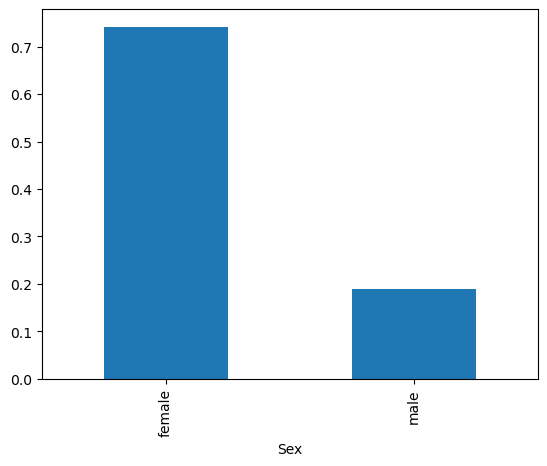

In [28]:
sex['Survived'].plot(kind = 'bar')

In [29]:
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

x = df2[col]
t = df2['Survived']

train_score, test_score, model = learn(x, t)

In [30]:
male = pd.get_dummies(df2['Sex'], drop_first = True)

male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [31]:
pd.get_dummies(df2['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [32]:
pd.get_dummies(df2['Embarked'], drop_first = True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [33]:
pd.get_dummies(df2['Embarked'], drop_first = False)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [34]:
x_temp = pd.concat([x, male], axis = 1) # contact関数で２つのデータフレームを横方向に連結

x_temp.head(2)

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0


In [35]:
tmp = pd.concat([x, x], axis = 0)
tmp.shape

(1782, 5)

In [36]:
for j in range(1,6): # jは木の深さ
    train_score, test_score, model = learn(x_temp, t, depth = j)
    sentence = '訓練データの正解率{}'
    sentence2 = 'テストデータの正解率{}'
    total_sentence = '深さ{}:'+sentence+sentence2
    print(total_sentence.format(j, train_score, test_score))

深さ1:訓練データの正解率0.787テストデータの正解率0.788
深さ2:訓練データの正解率0.792テストデータの正解率0.782
深さ3:訓練データの正解率0.847テストデータの正解率0.81
深さ4:訓練データの正解率0.854テストデータの正解率0.849
深さ5:訓練データの正解率0.865テストデータの正解率0.86


In [37]:
s1, s2, model = learn(x_temp, t, depth = 5)

import pickle
with open('survived.pkl', 'wb') as f:
    pickle.dump(model, f)

In [39]:
model.feature_importances_

array([0.12084767, 0.25107251, 0.06754808, 0.00275855, 0.05145686,
       0.50631633])

In [41]:
pd.DataFrame(model.feature_importances_, index = x_temp.columns)

,0
Pclass,0.120848
Age,0.251073
SibSp,0.067548
Parch,0.002759
Fare,0.051457
male,0.506316


In [42]:
df = pd.read_csv('ex4.csv')
df.head(3)

,class,dept_id,sex,score
0,3,0,1,60.170169
1,3,5,1,86.610078
2,2,6,1,69.761279


In [45]:
df['sex'].value_counts()
df['sex'].mean()

0.5133333333333333

In [44]:
df.groupby('class').mean()['score']

class
0    68.850195
1    69.510764
2    71.611092
3    67.572909
4    68.814253
Name: score, dtype: float64

In [50]:
pd.pivot_table(df, index = 'class', columns = 'sex', values = 'score')

sex,0,1
class,,
0,68.358569,69.274011
1,67.472218,71.379432
2,71.704884,71.532109
3,63.897676,72.013815
4,69.952314,67.676191


In [ ]:
dummy = pd.get_dummies(df['dept_id'], drop_first = True)
df